### INF 510 Fall 2019 Final Project Submission


1.	**The names of team member(s)**: 
    * Jiang Ruishan


2.	**How to run your code (what command-line switches they are, what happens when you invoke the code, etc.)**
    * This project requires the following packages:
        - pandas, numpy, seaborn, requests, beautifulsoup, squarify, re, matplotlib, PIL, wordcloud
    * This project requires to call the following python script:
        - data_analysis

    * AN IMPORTANT NOTE:
        * In case tere are still packages missing after cloning my environment.yml, along with *environment.yml*, I also include *requirements.txt*. The requirements.txt comes from *pip freeze > requirements.txt*. If some package did miss, please run : pip install -r requirements.txt to install the missing package.
 
        * To ensure the *keyword_world_cloud* function runs, you need the put *mm.png* and this notebook in the same folder
   * TO RUN THIS PROJECT, make sure the above packages are installed, and then simply clone the repo at *ADD link* and execute this notebook

3.	**Any major “gotchas” to the code (i.e. things that don’t work, go slowly, could be improved, etc.)**
   
   * There is a function in milestone3 notebook that runs extremely slow about 30-40 from my experience.
    * The function is called gender_classifier_runner. What this function do is to access the api to query a certain character's gender by giving the api the character's name. After querying, it will store the result into a csv file. 
    * For better project grading experience, I wrote a tester for this function that just query 5 character's gender.
    
    
4.  **Anything else you feel is relevant to the grading of your project your project.**
    
    * For some reason, the *gender_classifier_runner* function sometimes stuck after you input the number. You might need to restart the notebook over.


5. **What did you set out to study?  (i.e. what was the point of your project?  This should be close to your Milestone 1 assignment, but if you switched gears or changed things, note it here.)**
    * I am curious about how the Disney animated movie changes, in terms of their genre, keywords, rating, character gender.

    * There are 9 questions I raised:
        1. Over the 90 years which production company made most movie ?
        2. Over the 90 years which year released the most movie ?
        3. Over the 90 years which year released the highest meta rating movie ?
        4. Over the 90 years which year released the highest IMDb rating movie ?
        5. How has the genre change throughout the years ?
        6. What are the 10 most popular genres throughout the years ? 
        7. How did the the movie's genre and their average popularity per year change?
        8. How did the character's gender change over the 90 years?
        9. What are the most appear keywords in the movies? (from world cloud) 
        
    * I changed one of my dataset! 
        * The three datasets I used:
        *  Source 1: https://en.wikipedia.org/wiki/List_of_Disney_animated_universe_characters(web scrapper) 
        * Source 2: http://www.omdbapi.com (api)
        *  Source 3: https://api.themoviedb.org/3/movie/ (api) --- One new one that I changed 
        
    * Also: As the most movies' box-office data are missing, I changed some of my research questions
        * My research question changes from "analyzing the relationship between genre and character's gender with movies' box-office" to "analyzing the relationship between genre and character's gender with movies' imbd rating".


6. **What did you Discover/what were your conclusions (i.e. what were your findings?  Were your original assumptions confirmed, etc.?)**

   * 1 Walt Disney Pictures produce most movies among all the production company Disney owned, with the produced number of 26.
   * 2 The year 2016 release most Disney animated moive, with the number of 6.
   * 3 1940 release the highest meta score movie (Pinocchio ,7.4) while 2012 release the highest IMDb rating movie (Gravity Falls, 8.9).
   * 4 The most frequently appeared genre changes from Animation to Family over 90 years. 
   * 5 Over 90 years, Disney animated movies have more male characters than female characters. This trend has no closely relation with the numbers of animated movie Disney released. We can see from the two plot starting 1980 there are more released movie, however, the trend remains unchanged.
   * 6 The most appears keyword is "Musical", which means the music feature plays an important role in the Disney's movie. The reason might be the music is more engaging for child and may helps them understand emotion logic in the story.
   
  
7. **What difficulties did you have in completing the project?**  
   * As I don't have a lot statistics knowledge, it is hard for me to apply the models in the analysis and hard for me to tell what graph I should use to depict the relationship from the data. But I tried my best to explore the data I got.
    * If efforts counts! I would say I spent great efforts to research how other's analysis the movie data and try to draw insights and combine what they did.
    
    
8. **What skills did you wish you had while you were doing the project?**

    * I wish I had learnt statistics!
 
 
9. **What would you do “next” to expand or augment the project?**
    *  I know that my project has so much space for improvement, especially in the analysis part, but somehow I don't know where to start. I will start a statistics course as I find I can't do anything if I had no such knowledge. And try to learn from others on Github who did similar analysis. 

In [1]:
from src import data_analysis
from pathlib import Path

In [2]:
# importing csv files fetched from mile stone 2
genre_info= data_analysis.read_file('./data/genre_basic_info.csv')  
basic_info = data_analysis.read_file('./data/movie_basic_info.csv')
char_info = data_analysis.read_file("./data/char_basic_info.csv")
kw = data_analysis.read_file("./data/keywords_basic_info.csv")
char_gender_info = data_analysis.read_file("./data/char_info_update2.csv")

## Answering the first four questions by analyzing movie_basic_info.csv


In [3]:
"""
basic_info_stats function shows the movie's basic statistics information

INPUT:
the dataframe contains moive's name, released year, production company and their imbd rating

OUTPUT:
None, but will print out:
the production that makes the most movie
the year that released the most movie is
they year released the highest meta rating moive
the year released the highest IMDb rating moive
"""
data_analysis.basic_info_stats(basic_info)

Showing the movie's basic statistics information : 

 **  The production company made the most movie is: *Walt Disney Pictures*; A total 26 movie is made ** 
 **  The year released the most movie is: *2016*; A total 6 movie is released ** 
 **  In *1940* there released the highest meta rating moive: 7.4 for movie "Pinocchio" ** 
 **  In *2012* there released the highest IMDb rating moive: 8.9 for movie "Gravity Falls" ** 


**After the analysis of data in movie_basic_info.csv, we know that:**
1. Walt Disney Pictures produce most movies among all the production company Disney owned, with the produced number of 26
2. The year 2016 release most Disney animated moive, with the number of 6
3. 1940 release the highest meta score movie (Pinocchio ,7.4) while 2012 release the highest IMDb rating movie (Gravity Falls, 8.9) ; 
4. From the analysis I raise a the hypthesis that the meta score of a Disney animated movie is likely to be lower that its imbd rating, which may be interesting to looked into.

## Answering the 5-7 questions by analyzing genre_basic_info.csv


In [4]:
# Answering research question 5: how has the genre change throughout the years ?
"""
genre_change_overtime function calculates how disney animated moive's genre change during the decades

INPUT:
the dataframe contains movie genre and movie released year

OUTPUT:
print out the the most frequent appeared disney animated moive's genre of each decade

"""
print ("Showing how Disney animated movie's most frequent appeared genre has changed throughout the 90 years: " )
data_analysis.genre_change_overtime(genre_info)

Showing how Disney animated movie's most frequent appeared genre has changed throughout the 90 years: 
===
In 1925 to 1937 the most frequent genre type is:  Animation
===
In 1938 to 1947 the most frequent genre type is:  Animation
===
In 1948 to 1963 the most frequent genre type is:  Animation
===
In 1964 to 1983 the most frequent genre type is:  Animation
===
In 1985 to 1994 the most frequent genre type is:  Animation
===
In 1995 to 2004 the most frequent genre type is:  Family
===
In 2005 to 2015 the most frequent genre type is:  Family
===
In 2016 to 2018 the most frequent genre type is:  Family


Showing the tree map that depict the mostly appeared 10 genre type and their percentage over 90 years :


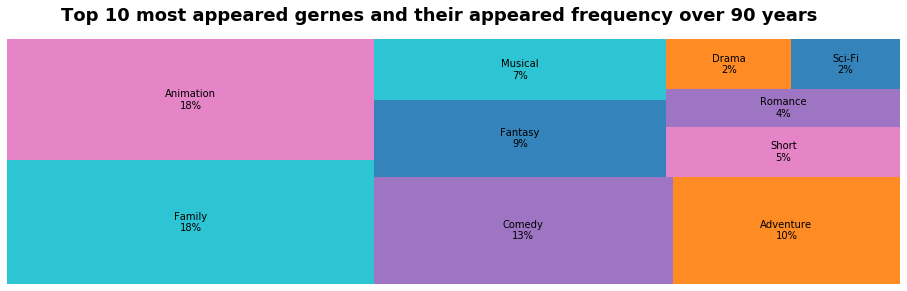

In [5]:
# Answering research question 6: what are the 10 most popular genres throughout the years?
"""
most10_genre_tree_map function draws a tree map of the top 10 most appeared genre and their appeared frequency over the 90 years

INPUT:
the dataframe contains genre infomation

OUTPUT:
the tree map of the top 10 most appeared genre and their appeared frequency over the 90 years

"""
print ("Showing the tree map that depict the mostly appeared 10 genre type and their percentage over 90 years :")
data_analysis.most10_genre_tree_map(genre_info)

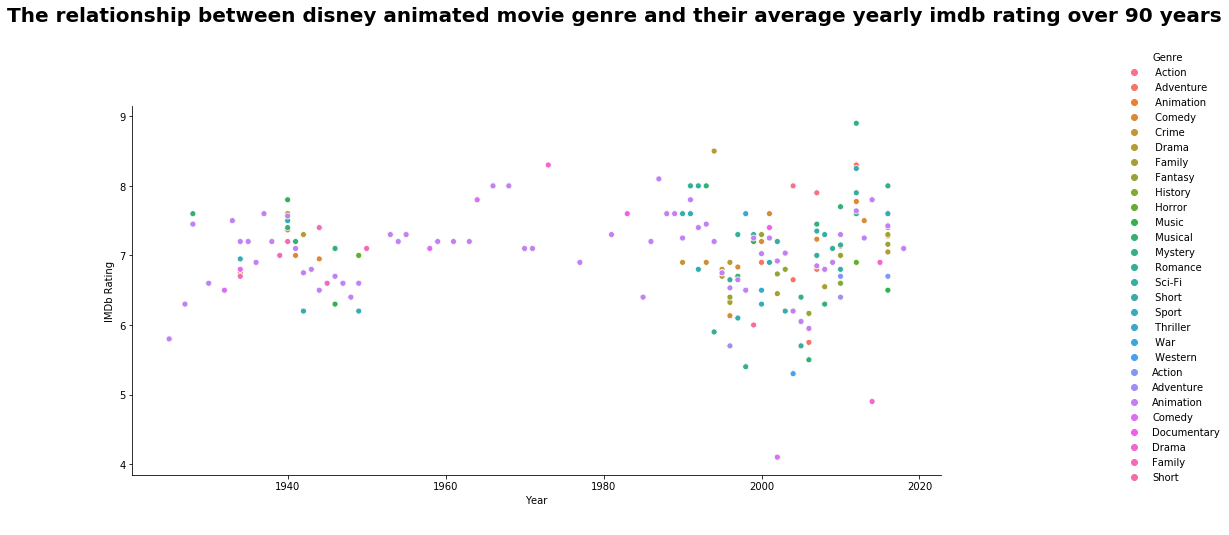

In [6]:
# Answering research question 6: what is the relationship between the movie's genre and their yearly average popularity change
"""
genre_rating_relation draws a scatter plot that show the relationship between the movie genre and their imdb rating over 90 years

INPUT:
the dataframe contains genre information

OUTPUT:
a scatter plot that show the relationship between the movie genre and their imdb rating over 90 years

"""
data_analysis.genre_rating_relation(genre_info)

**After the analysis of genre_basic_info.csv, we know that:**

1 The most frequently appeared genre changes from Animation to Family. I found the word "Animation" has no semantic meaning when used to describe Disney animated movie's genre. But the change starting the end of the 21st century might have some interesting implication. The change might happened because the influence the emerge of internet, which made Disney pay more attend to their movie's tag to increase the chance of their movies being searched and better reach the targeting customer. 

2 We can see from the tree map, the most frequent appeared movies genre are the Family and Animation, followed by Adventure, Comedy and Fantasy, which confirms that Disney's animated movie's main targeting audience are family with kids.

3 From the scatter plot, we can see during the end of 20th century and the beginning of the 21st century, there seems to be more a average rating decrease, with servel movie genre's averge imbding rating below 6. The year 2002 the a genre witness the lowest average imbd rating movie. But starting around 2008, there seems to be a slightly increase of the avergae imbding rating per genre.

## Answering reasearch question 8 by analyzing char_basic_info.csv

In [8]:
"""
gender_classifier_runner function goes through the gender querying by calling get_char_gender function
Noted: as the runner takes a long time to get the final result, there is a test sample in the runner function as well
"""
data_analysis.gender_classifier_runner(char_info)

 !!! This character gender classification function took me over 30 mins to get the result !!!
--------------------
If you want to see the test sample please press 1
If you want to skip the process and see the result please press 2
If you want to see the whole process please press 3
--------------------
Your input: 1
The test will show 5 names and its gender
0 Abby Mallard -1.33 female
1 Buck Cluck 1.95 male
2 Chicken Little 0.04999999999999993 male
3 Fish Out of Water 2.7 male
4 Foxy Loxy -0.030000000000000027 female


,Movie Name,Year,Character,IMDb Rating,Box Office,gender
0,Chicken Little,2005,Abby Mallard,5.7,135289768.0,female
1,Chicken Little,2005,Buck Cluck,5.7,135289768.0,male
2,Chicken Little,2005,Chicken Little,5.7,135289768.0,male
3,Chicken Little,2005,Fish Out of Water,5.7,135289768.0,male
4,Chicken Little,2005,Foxy Loxy,5.7,135289768.0,female
...,...,...,...,...,...,...
914,The Reluctant Dragon,1941,Sir Giles,7.0,NaN,NaN
915,The Reluctant Dragon,1941,Tobias the Reluctant Dragon,7.0,NaN,NaN
916,Frankenweenie,2012,Sparky,6.9,35287788.0,NaN
917,The Weekenders,2000,Tino Tonitini,8.0,NaN,NaN


Test end


Showing the female character's percentage change in Disney animated movies over the years : 


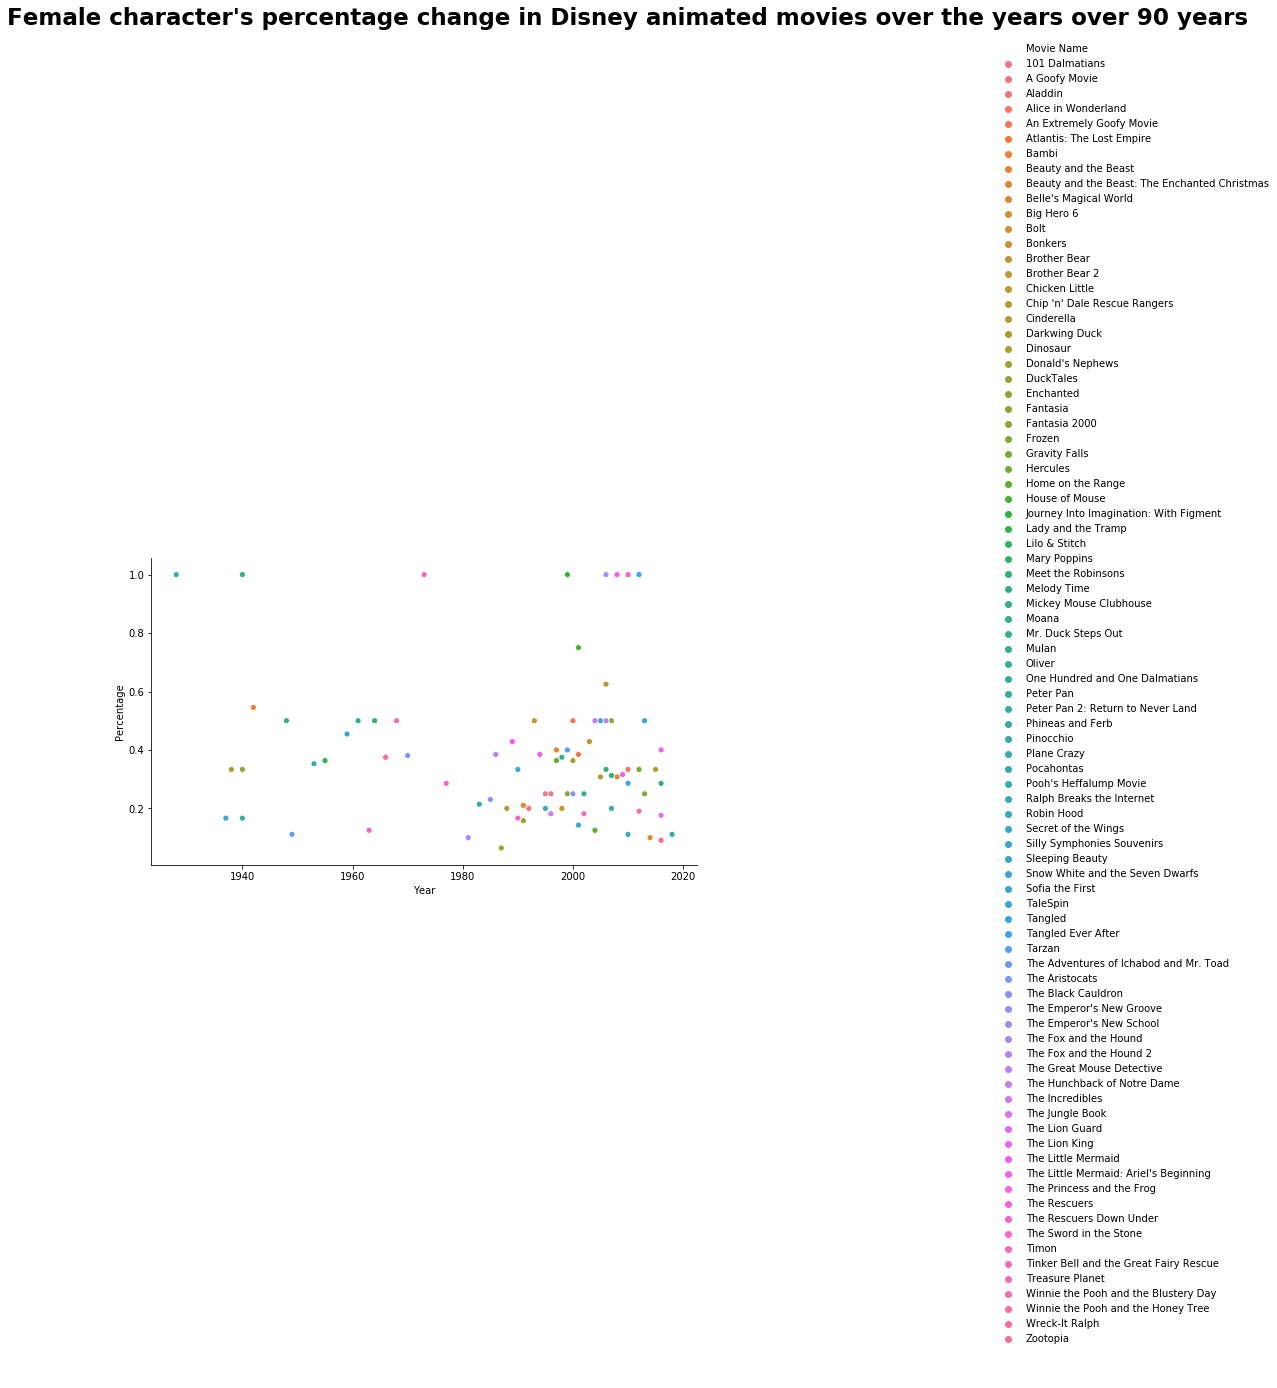

In [9]:
"""
display_female_char_per function will draw a scatter plot that depicts how female character's percentage change in Disney animated movies over the years over 90 years

INPUT:
a dataframe contains character gender inforamtion

OUTPUT:
a scatter plot that depicts how female character's percentage change in Disney animated movies over the years over 90 years
"""
print ("Showing the female character's percentage change in Disney animated movies over the years : ")
data_analysis.display_female_char_per(char_gender_info)

Showing the male character's percentage change in Disney animated movies over the years : 


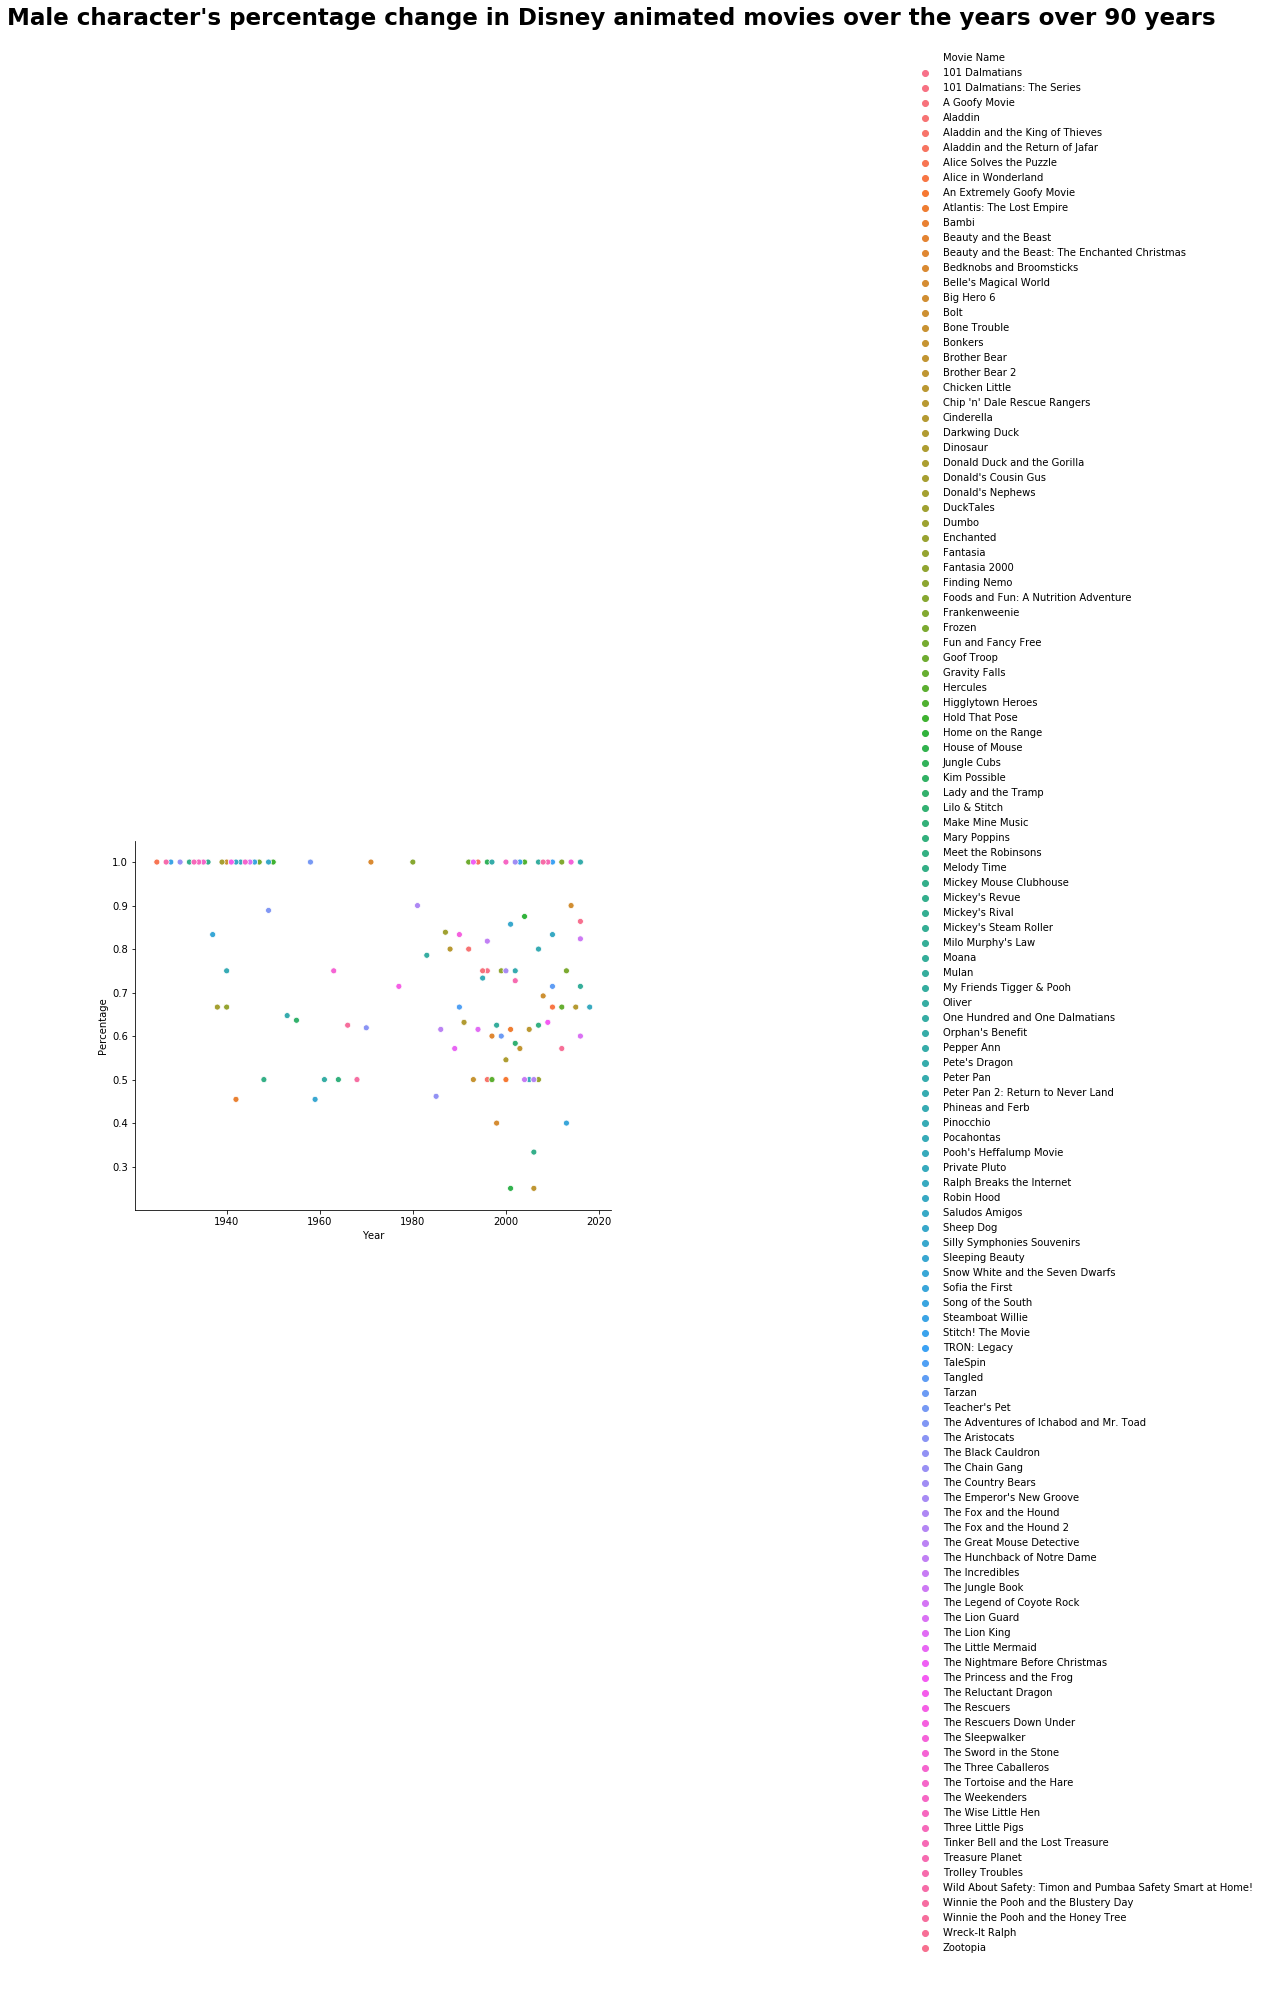

In [10]:
"""
display_male_char_per function will draw a scatter plot that depicts how male character's percentage change in Disney animated movies over the years over 90 years

INPUT:
a dataframe contains character gender inforamtion

OUTPUT:
a scatter plot that depicts how male character's percentage change in Disney animated movies over the years over 90 years
"""
print ("Showing the male character's percentage change in Disney animated movies over the years : ")
data_analysis.display_male_char_per(char_gender_info)

**After analyzing char_basic_info.csv, we know that:**

* Over the years, Disney animated movies have more male characters than female characters. This trend has no closly relation with the numbers of animated movie Disney released. We can see from the two plot starting 1980 there are more released movie, however, the trend remains unchanged.

## Answering reasearch question 8 by analyzing keyword_basic_info.csv

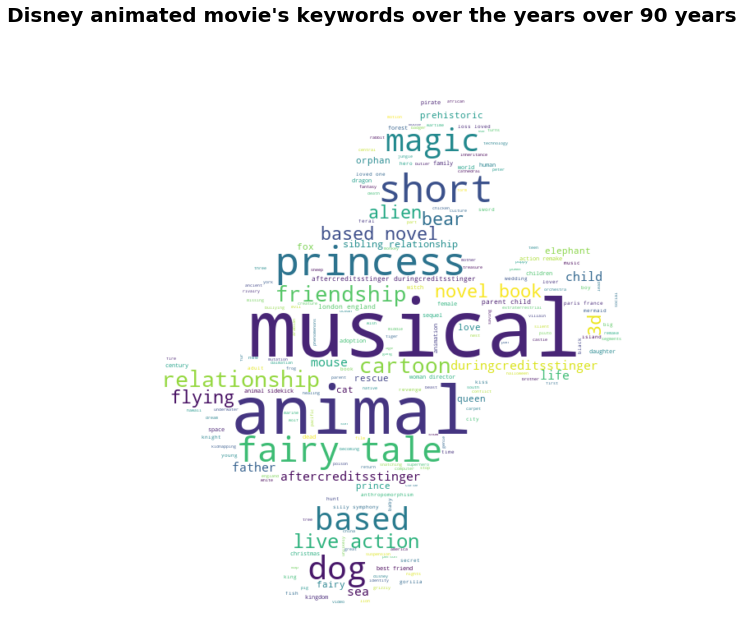

In [13]:
"""
keyword_world_cloud function draws a world cloud that is made of all the disney animated movie's keyword

INPUT:
a dataframe contains keyword information

OUTPUT:
a world cloud that is made of all the disney animated movie's keyword
"""
data_analysis.keyword_world_cloud(kw)

**After analyzing keywords_basic_info.csv, we know that:**
* The most appears keyword is "Musical", which means the music feature plays an important role in the Disney's moive. The reason might be the music is more engaging for child and may helps them understand emotion logic in the story.
* Other prominent keywards are: animal, princess, magic, friendship, fairy tale, dog, flying. These keywords all indicate Disney is working hard to orchestrates a world the children would love to be in.